<img src="images/MLP_binary_classifier_cropped.png" width = "350" style="float: right;">

# Multilayer perceptron for non-linear classification

The flexibility of the neural networks comes from combining many artificial neurons into a single machine learning model organized in multiple layers. Linear layers of neurons with multiple outputs can be stacked one after another resulting in a **multi layer perceptron** model. If we add non-linear activation functions between the layers, we will be able to create flexible non-linear models. Networks consisting of several linear layers are also called **fully connected deep neural networks**. 

The image on the right illustrates a two-layer network that we will create to build a **non-linear binary classifier**. It has two input features. The first linear layer has two inputs and six outputs. Multiple outputs will give us flexibility to fit a highly non-linear decision boundary. The six outputs of the first layer will become inputs of the second layer, which has only one output. After the first layer, we will have **ReLU** activation, to introduce non-linearity to the network. After the second layer we have **Sigmoid** activation to build a binary classifier.

## Exercise: Non-linear classifier

In this exercise we are going to fit a multi-layer perceptron to a simulated dataset with two co-centric circles. Run the cell below to create and display the dataset.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
from sklearn.metrics import accuracy_score

X:  torch.Size([500, 2])
y:  torch.Size([500, 1])


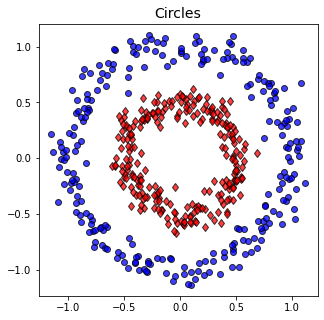

In [2]:
from sklearn.datasets import make_circles

X,y = make_circles(n_samples=500,factor=0.5, noise=0.08)

X = torch.from_numpy(X).float()
y = torch.from_numpy(y.reshape(-1,1)).float()
print('X: ', X.shape)
print('y: ', y.shape)

def PlotData2(X,y):
    y=y.flatten()
    plt.plot(X[y==0,0],X[y==0,1],'bo',alpha=0.75,markeredgecolor='k')
    plt.plot(X[y==1,0],X[y==1,1],'rd',alpha=0.75,markeredgecolor='k')
    plt.axis('equal')
    plt.title('Circles', fontsize = 14)
    #plt.axis('off')

plt.figure(figsize = (5,5))
PlotData2(X,y)

We need a slightly different function to plot the classification result, run the code below.

In [3]:
def PlotClassification2(net,X,y):

    # Create an 1D array of samples for each feature
    a = 0.2
    x1 = np.linspace(X[:,0].min()-a, X[:,0].max()+a, 1000) 
    x2 = np.linspace(X[:,1].min()-a, X[:,1].max()+a, 1000).T # note the transpose
    # Creates 2D arrays that hold the coordinates in 2D feature space
    x1, x2 = np.meshgrid(x1, x2) 
    # Flatten x1 and x2 to 1D vector and concatenate into a feature matrix
    Feature_space = np.c_[x1.ravel(), x2.ravel()] 
    
    # NEW: convert numpy to torch
    Feature_space = torch.from_numpy(Feature_space).float()
    # NEW: Predict output scores for the whole feature space    
    output_scores = net(Feature_space)
    # NEW: Threshold output scores
    y_pred = (output_scores>0.5).long()
    
    # Resahpe to 2D
    y_pred = y_pred.reshape(x1.shape)
    # Plot using contourf
    plt.contourf(x1, x2, y_pred, cmap = 'summer')
    
    # Plot data
    PlotData2(X,y)
    plt.axis('off')

**Task 1:** In the cell below is a working code to fit a single-layer perceptron to the dataset. Run the code. What do you observe? Is the classifier suitable for the dataset?

**Answer:** This is a linear classifier that cannot fit this highly non-linear dataset

**Task 2:** Modify the network architecture so that it can fit this non-linear dataset. In function `__init__` implement 
* linear `layer1` with two inputs and 6 outputs
* `ReLU` activation
* linear `layer2` with 6 inputs and one output
* `Sigmoid` activation
Then modify the `forward` function accordingly. Run the cell to train and display the multi-layer perceptron classifier.

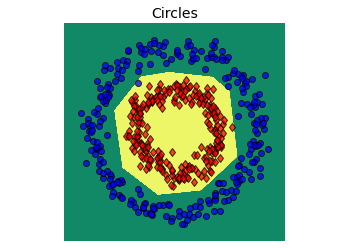

In [4]:
class MLPClassifier(nn.Module):
    def __init__(self):
        super(MLPClassifier, self).__init__()
        self.layer1 = nn.Linear(2, 6)
        self.relu = nn.ReLU() 
        self.layer2 = nn.Linear(6, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.layer1(x)
        x = self.relu(x)
        x = self.layer2(x)
        x = self.sigmoid(x)
        return x
    
def train(net, X, y):
    loss_function = nn.BCELoss()
    optimizer = torch.optim.SGD(net.parameters(), lr=0.2, momentum=0.75)
    epochs = 500
    for i in range(epochs):
        optimizer.zero_grad() 
        prediction = net(X) 
        loss = loss_function(prediction, y) 
        loss.backward()       
        optimizer.step()   
    return net

net2 = MLPClassifier()
train(net2,X,y)
PlotClassification2(net2,X,y)

**Task 3 (optional):** Simulate an additional dataset to create an independent test set. Calculate accuracy on this dataset.

In [5]:
# simulate test set
X_test, y_test = make_circles(n_samples=500,factor=0.5, noise=0.08)

# convert to tensors
X_test = torch.from_numpy(X_test).float()
y_test = torch.from_numpy(y_test.reshape(-1,1)).float()
print('X_test: ', X_test.shape)
print('y_test: ', y_test.shape)

X_test:  torch.Size([500, 2])
y_test:  torch.Size([500, 1])


In [6]:
# predict probabilities for class 1
pred = net2(X_test)

# threshold to create labels
y_pred_test = (pred>=0.5).long()

# calculate accuracy
accuracy_score(y_test,y_pred_test)

0.998